# 1: Intro to DuckDB

---

By Jean-Yves Tran | jy.tran@[datascience-jy.com](https://datascience-jy.com) | [LinkedIn](https://www.linkedin.com/in/jytran-datascience/)  
IBM Certified Data Analyst 

---

Source: 
- [Getting Started with DuckDB](https://www.packtpub.com/en-ar/product/getting-started-with-duckdb-9781803232539) by Simon Aubury & Ned Letcher
- [DuckDB documentation](https://duckdb.org/docs/)
---

The interactive links in this notebook are not working due to GitHub limitations. View this notebook with the interactive links working [here](https://nbviewer.org/github/jendives2000/Data_ML_Practice_2025/blob/main/1-3-SQL/practice/dvd_rental/3_PostGreSQL_SQLAlchemy_Biz-database_dvdrental_3.ipynb).

---

This is an introduction on DuckDB, an increasingly popular (2025) SQL toolkit. I will quickly introduce the what and the why so that I can show some SQL queries as soon as possible. 

## **SQLite for OLAP = DuckDB**
DuckDB is indeed similar to SQLite in that both are **in-process** databases that **write to a single-file** storage format and are **free and open source**.  

**Key difference**:  
SQLite is optimized for transactional **(OLTP) workloads** (it is very good at reading rows, not columns), while DuckDB is designed specifically for analytical queries because of its **optimization for OLAP workloads** (columns).
Often referred to as “SQLite for OLAP”, as it is the **first production-ready in-process OLAP DBMS**.

### **In-process**: 
Being in-process means that DuckDB runs **inside the same process as the application**, eliminating the need for a separate database service. This makes it lightweight, fast, and easy to integrate, especially for analytical **workloads where data is processed locally** rather than stored on a central database server.

**No Client-Server Communication**

Traditional databases like PostgreSQL or MySQL run as separate services (often on a remote server) and require network communication between the application and the database.
DuckDB, being in-process, does **not require network communication** because it runs directly within the application’s memory space. This makes DuckDB ideal for fast, interactive analytics on local data.

DuckDB is an **embedded, high-performance OLAP database designed for analytics, offering SQL-based querying and a simplified installation process**, making it an attractive alternative for analytical workloads compared to traditional client-server databases.

## **Why Use DuckDB**?
1. Two Main Use Cases
- **Analytical Workflows** → For data analysts, data scientists, and ML engineers, DuckDB enables fast, **scalable**, and SQL-based **data wrangling, exploration, and transformation**.  
  
- **Operational Data Infrastructure & Interactive Apps** → For data engineers and software developers, DuckDB can **power ETL** pipelines, **lightweight data lakes**, and **real-time dashboards** with low-latency analytics.

### **Use case 1: Analytical Workflows?**
- Handles **large datasets efficiently** on a single machine, **reducing the need** for complex distributed systems like Spark.
- Works out-of-core, meaning it can **process datasets larger than memory**.
- **Faster** than Pandas, Dask, and Polars **for complex** SQL-based analytics.
- Provides **DBMS features** (ACID transactions, constraints, data integrity) that **dataframe libraries lack**.

### **Enhanced Performance**
⚡ **Optimized for OLAP** → Efficient for columnar analytics, large joins, and aggregations
🔗 Seamless integration with **CSV, Parquet, JSON**, and external databases like **PostgreSQL & MySQL**
🔄 Works with **Pandas, Polars, R, and Arrow** → Bridges the gap between databases and dataframe workflows

### **Use case 2: Building Block for Data Infrastructure**
🔹 **Can replace Apache Spark in some ETL workflows** by running transformations locally
🔹 A **lightweight alternative to Google BigQuery, Snowflake, and ClickHouse** for medium-scale data warehouses
🔹 Used for **real-time dashboards & BI tools** (e.g., Mode, Hex, Rill) that need fast query performance.

### **DuckDB as a Pre-Scaling SQL Solution**
DuckDB is highly valuable for companies **until they truly need to scale out** to a cloud-based distributed system. It serves as an efficient, high-performance SQL engine for managing and analyzing data locally before cloud-scale infrastructure becomes necessary.

**When to Scale Beyond DuckDB?**
🚀 You need multi-user, concurrent access.
🚀 Your data size exceeds what can be efficiently processed on a single machine.
🚀 Your company needs cloud-native, real-time distributed processing.

### **Versatility & Other Niceties**: 

Not only can DuckDB support Parquet, CSV, and JSON formats and read/write files from disk or cloud storage (S3). It can also **connect to PostgreSQL, MySQL, and SQLite** to run queries across multiple databases.

Here are other nice things DuckDB offers (among other things):  
- **Efficient Storage** → DuckDB uses compression algorithms to reduce disk storage, improving read performance.
- **Query Optimization** → DuckDB rewrites queries for better efficiency instead of running them as written.
- **Parallel Processing** → Most operations automatically run on multiple CPU threads, speeding up queries.
- **Python-Like Syntax** → Supports simple string and list slicing, list comprehensions, and lambda functions in SQL.
- **Chained Function Calls** → Similar to pandas, allowing method-style query chaining.
- **Trailing Commas** → SQL queries support trailing commas for cleaner syntax.

### **Install and use it almost everywhere**: 
- **Multiple Client APIs**→ DuckDB supports Python, R, JavaScript, Rust, Swift, Julia, Java, C, and C++ for easy integration.
- **JavaScript Support** → Two versions: Node.js (backend use) and Wasm (runs in a web browser).
- **Command-Line Interface (CLI)** → A cross-platform executable that works on any system with a command line.
- **Community-Supported Clients** → Additional support for Go, C#, Ruby, Common Lisp, Zig, and Crystal.
- **Flexible Deployment** → Can be used in analytical workflows, operational infrastructure, and data products across diverse environments.

## **When not to use DuckDB**:
- **Not for OLTP** → DuckDB is built for analytical (OLAP) workloads, not transactional (OLTP) use cases with frequent small writes. If you need an in-process OLTP database, SQLite is a better choice.
- **Single Process Write Limitation** → Only one process can write to a DuckDB database at a time. Multiple processes can read, but only in read-only mode.
- **Not for Petabyte-Scale Data** → While DuckDB is fast on a single machine, it’s not designed for distributed computing. If you need to process petabyte-scale data, a cloud-based or distributed system is required.


---

## Installing DuckDB CLI:  

Just like the CLI from Linux, DuckDB has its own CLI that can operate on any system. 
Very straightforward. In my terminal I download the binary file:  
- `Invoke-WebRequest -Uri "https://github.com/duckdb/duckdb/releases/download/v1.2.0/duckdb_cli-windows-amd64.zip" -OutFile "duckdb_cli-windows-amd64.zip"`

Then I unzip it:  
- `Expand-Archive -Path "duckdb_cli-windows-amd64.zip" -DestinationPath .
`

And I activate it with: `.\duckdb` 

My terminal now looks like this:   

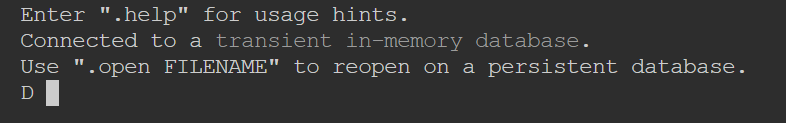

I now need to import it.

### **Imports**: 

In [2]:
import duckdb

ModuleNotFoundError: No module named 'duckdb'